In [ ]:
import numpy as np
import sympy as sp
import cirq
from cirq.contrib.svg import SVGCircuit

In [ ]:
def one_qubit_unitary(qubit, symbols):
  return cirq.Circuit(
    [cirq.rz(symbols[0])(qubit),
      cirq.ry(symbols[1])(qubit),
      cirq.rz(symbols[2])(qubit)]
  )

In [ ]:
def two_qubit_unitary(qubits):
  cx_ops = [cirq.CX(q0, q1) for q0, q1 in zip(qubits, qubits[1:])]
  cx_ops += ([cirq.CX(qubits[-1], qubits[0])] if len(qubits) != 2 else [])
  return cx_ops

In [ ]:
def parameterised_circuit(qubits,layers):
  circuit = cirq.Circuit()
  num_qubits = len(qubits)
  input_symbols = sp.symbols('x_:'+str(num_qubits))
  param_symbols = sp.symbols('theta_:'+str(3*num_qubits*layers))
  param_symbols = np.reshape(param_symbols,(layers,num_qubits,3))
  for i in range(num_qubits):
    circuit += cirq.ry(input_symbols[i])(qubits[i])
  
  for layer in range(layers):
    for i,q in enumerate(qubits):
      circuit += one_qubit_unitary(q,param_symbols[layer,i,:])
    circuit += two_qubit_unitary(qubits)
  
  return circuit

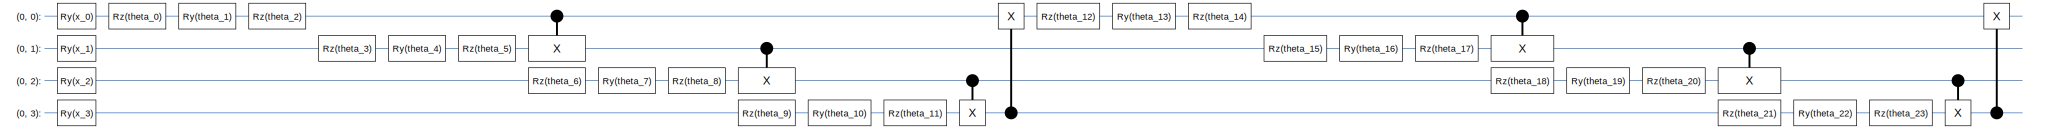

In [ ]:
demo_circuit = parameterised_circuit(cirq.GridQubit.rect(1,4),layers=2)
SVGCircuit(demo_circuit)